<a href="https://www.kaggle.com/code/allasamoilenko/data-analysis-crime-samoilenko?scriptVersionId=235086181" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import tree

In [3]:
data ='/kaggle/input/crime-cast-forecasting-crime-categories/train.csv'

df = pd.read_csv(data)
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [4]:
df.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [6]:
df['Date_Reported'] = pd.to_datetime(df['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

In [7]:
datetime_columns = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()
datetime_columns 

['Date_Reported', 'Date_Occurred']

In [8]:
numb_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numb_columns 

['Latitude',
 'Longitude',
 'Time_Occurred',
 'Area_ID',
 'Reporting_District_no',
 'Part 1-2',
 'Victim_Age',
 'Premise_Code',
 'Weapon_Used_Code']

In [9]:
categor_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categor_columns 

['Location',
 'Cross_Street',
 'Area_Name',
 'Modus_Operandi',
 'Victim_Sex',
 'Victim_Descent',
 'Premise_Description',
 'Weapon_Description',
 'Status',
 'Status_Description',
 'Crime_Category']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Location               20000 non-null  object        
 1   Cross_Street           3448 non-null   object        
 2   Latitude               20000 non-null  float64       
 3   Longitude              20000 non-null  float64       
 4   Date_Reported          20000 non-null  datetime64[ns]
 5   Date_Occurred          20000 non-null  datetime64[ns]
 6   Time_Occurred          20000 non-null  float64       
 7   Area_ID                20000 non-null  float64       
 8   Area_Name              20000 non-null  object        
 9   Reporting_District_no  20000 non-null  float64       
 10  Part 1-2               20000 non-null  float64       
 11  Modus_Operandi         17259 non-null  object        
 12  Victim_Age             20000 non-null  float64       
 13  V

In [11]:
area_mapping = df.groupby('Area_ID')['Area_Name'].unique().reset_index()
area_mapping['Unique_Count'] = area_mapping['Area_Name'].apply(len)

result = area_mapping[area_mapping['Unique_Count'] > 1]
result

,Area_ID,Area_Name,Unique_Count


In [12]:
print("Рядки з Area_ID, але без Area_Name:", df[df['Area_ID'].notna() & df['Area_Name'].isna()].shape[0])
print("Рядки з Area_Name, але без Area_ID:", df[df['Area_Name'].notna() & df['Area_ID'].isna()].shape[0])

Рядки з Area_ID, але без Area_Name: 0
Рядки з Area_Name, але без Area_ID: 0


In [13]:
print("Унікальних Area_ID:", df['Area_ID'].nunique())
print("Унікальних Area_Name:", df['Area_Name'].nunique())

Унікальних Area_ID: 21
Унікальних Area_Name: 21


In [14]:
pd.pivot_table(df, index='Area_ID', columns='Area_Name', aggfunc='size', fill_value=0)

Area_Name,77th Street,Central,Devonshire,Foothill,Harbor,Hollenbeck,Hollywood,Mission,N Hollywood,Newton,...,Olympic,Pacific,Rampart,Southeast,Southwest,Topanga,Van Nuys,West LA,West Valley,Wilshire
Area_ID,,,,,,,,,,,,,,,,,,,,,
1.0,0,1156,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,931,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1130,0,0,0,0,0
4.0,0,0,0,0,0,755,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.0,0,0,0,0,872,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.0,0,0,0,0,0,0,1014,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,943
8.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,910,0,0
9.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,902,0,0,0


In [15]:
df = df.drop(columns=['Area_ID'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Location               20000 non-null  object        
 1   Cross_Street           3448 non-null   object        
 2   Latitude               20000 non-null  float64       
 3   Longitude              20000 non-null  float64       
 4   Date_Reported          20000 non-null  datetime64[ns]
 5   Date_Occurred          20000 non-null  datetime64[ns]
 6   Time_Occurred          20000 non-null  float64       
 7   Area_Name              20000 non-null  object        
 8   Reporting_District_no  20000 non-null  float64       
 9   Part 1-2               20000 non-null  float64       
 10  Modus_Operandi         17259 non-null  object        
 11  Victim_Age             20000 non-null  float64       
 12  Victim_Sex             17376 non-null  object        
 13  V

In [17]:
part = df[['Part 1-2']]
part.head(20)

,Part 1-2
0,1.0
1,1.0
2,2.0
3,1.0
4,1.0
5,2.0
6,1.0
7,1.0
8,1.0
9,2.0


In [18]:
part = df[['Crime_Category']]
part.head(20)

,Crime_Category
0,Property Crimes
1,Property Crimes
2,Property Crimes
3,Property Crimes
4,Property Crimes
5,Violent Crimes
6,Property Crimes
7,Property Crimes
8,Property Crimes
9,Property Crimes


In [19]:
pd.pivot_table(df, index='Crime_Category', columns='Part 1-2', aggfunc='size', fill_value=0)

Part 1-2,1.0,2.0
Crime_Category,,
Crimes against Persons,33,192
Crimes against Public Order,331,1477
Fraud and White-Collar Crimes,0,1355
Other Crimes,0,179
Property Crimes,9658,2008
Violent Crimes,1615,3152


In [20]:
df['Part 1-2'] = df['Part 1-2'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Location               20000 non-null  object        
 1   Cross_Street           3448 non-null   object        
 2   Latitude               20000 non-null  float64       
 3   Longitude              20000 non-null  float64       
 4   Date_Reported          20000 non-null  datetime64[ns]
 5   Date_Occurred          20000 non-null  datetime64[ns]
 6   Time_Occurred          20000 non-null  float64       
 7   Area_Name              20000 non-null  object        
 8   Reporting_District_no  20000 non-null  float64       
 9   Part 1-2               20000 non-null  category      
 10  Modus_Operandi         17259 non-null  object        
 11  Victim_Age             20000 non-null  float64       
 12  Victim_Sex             17376 non-null  object        
 13  V

In [21]:
numb_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Числові стовпці для аналізу:", numb_columns)

Числові стовпці для аналізу: ['Latitude', 'Longitude', 'Time_Occurred', 'Reporting_District_no', 'Victim_Age', 'Premise_Code', 'Weapon_Used_Code']


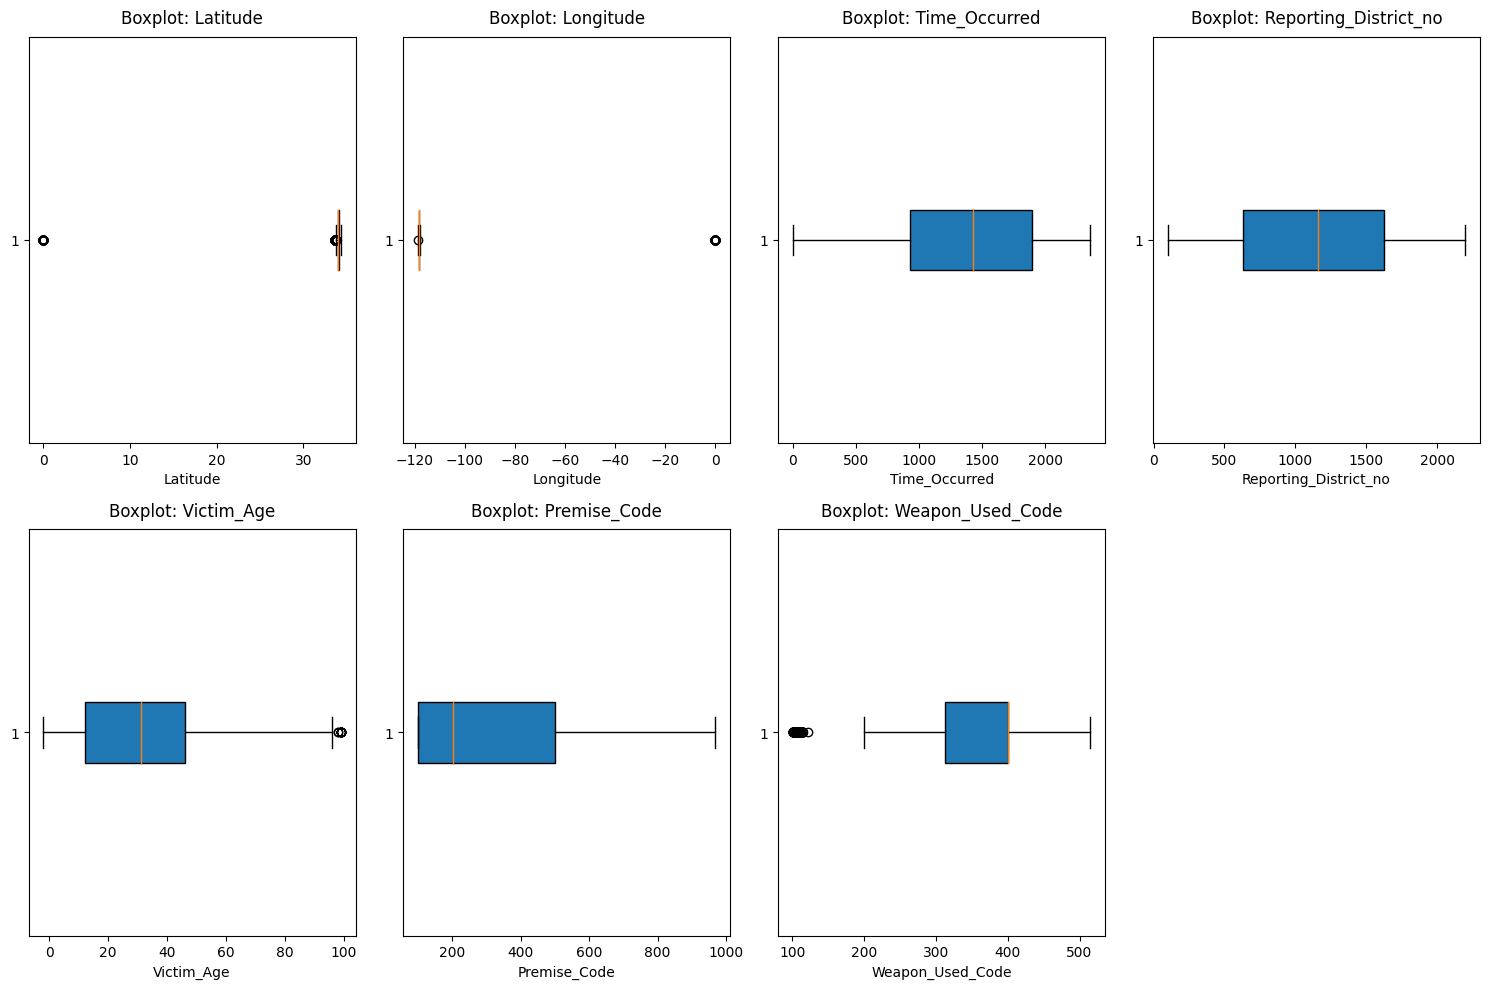

In [22]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numb_columns, 1):
    plt.subplot(2, 4, i)
    plt.boxplot(df[column].dropna(), vert=False, patch_artist=True)
    plt.title(f'Boxplot: {column}', pad=10)
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [23]:
df = df[df['Latitude'] >= 30]

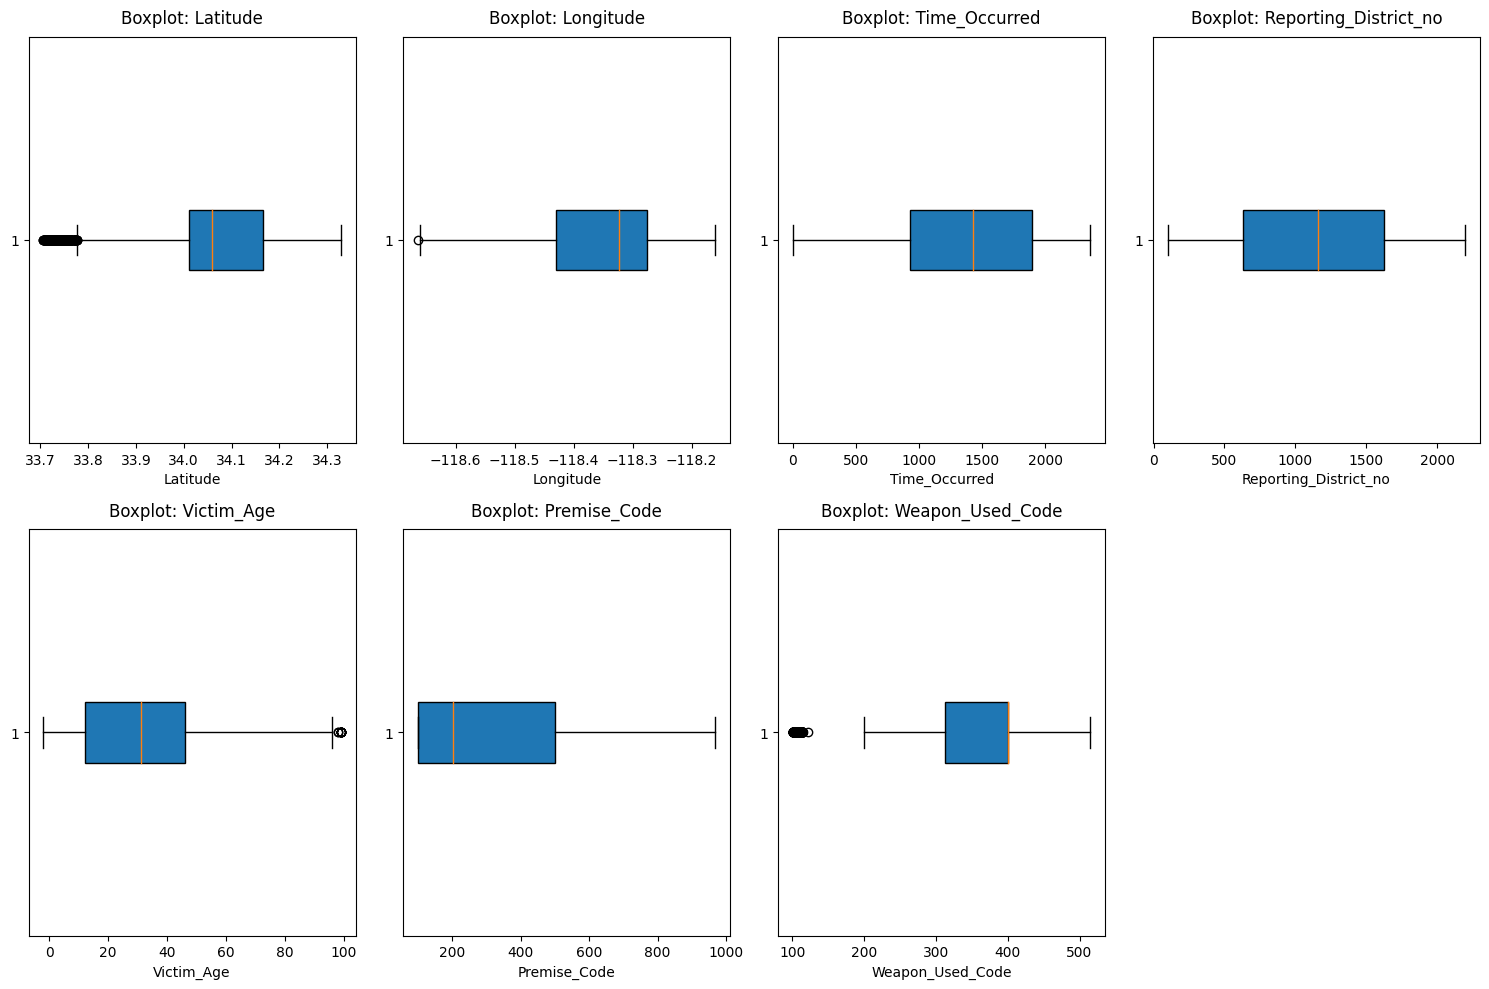

In [24]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numb_columns, 1):
    plt.subplot(2, 4, i)
    plt.boxplot(df[column].dropna(), vert=False, patch_artist=True)
    plt.title(f'Boxplot: {column}', pad=10)
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [25]:
df = df[(df['Victim_Age'] >= 10) & (df['Victim_Age'] <= 100)]

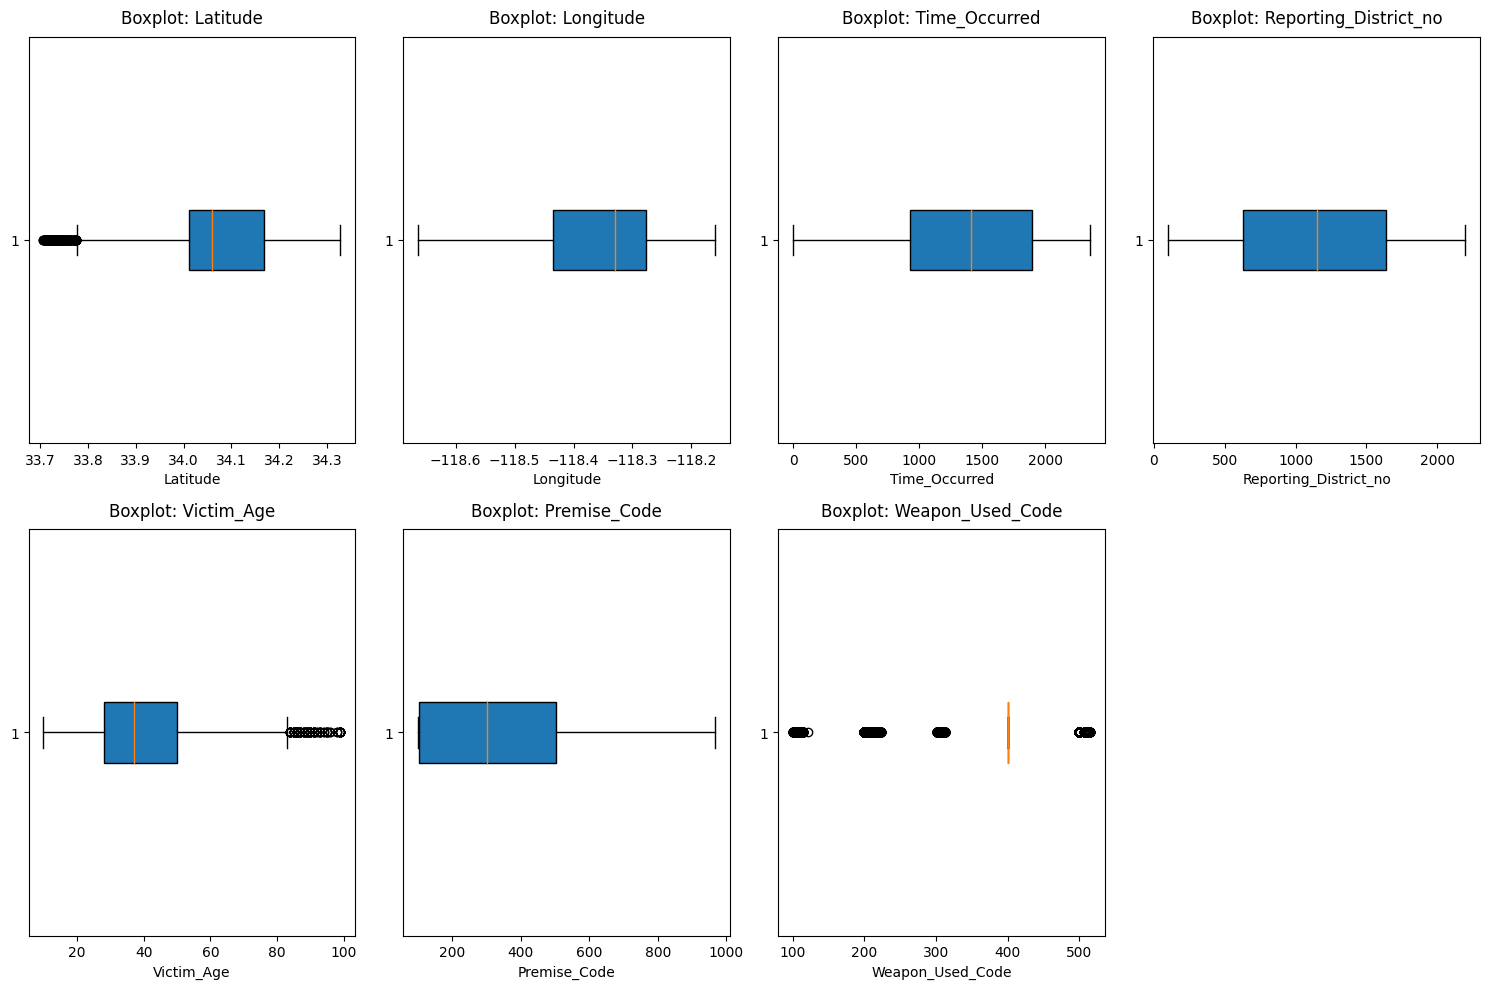

In [26]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numb_columns, 1):
    plt.subplot(2, 4, i)
    plt.boxplot(df[column].dropna(), vert=False, patch_artist=True)
    plt.title(f'Boxplot: {column}', pad=10)
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [27]:
df['Weapon_Used_Code'].head(20)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


0       NaN
1     400.0
2       NaN
3       NaN
5     400.0
7       NaN
9       NaN
10      NaN
11    511.0
13    207.0
14    102.0
16      NaN
17    500.0
18      NaN
19    400.0
20      NaN
21      NaN
24      NaN
25      NaN
26      NaN
Name: Weapon_Used_Code, dtype: float64

In [28]:
pd.pivot_table(df, index='Weapon_Used_Code', columns='Weapon_Description', aggfunc='size', fill_value=0)

Weapon_Description,AIR PISTOL/REVOLVER/RIFLE/BB GUN,AXE,BELT FLAILING INSTRUMENT/CHAIN,BLUNT INSTRUMENT,BOARD,BOTTLE,BOWIE KNIFE,BRASS KNUCKLES,CLEAVER,CLUB/BAT,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",STUN GUN,SWITCH BLADE,TIRE IRON,TOY GUN,UNKNOWN FIREARM,UNKNOWN TYPE CUTTING INSTRUMENT,UNKNOWN WEAPON/OTHER WEAPON,VEHICLE,VERBAL THREAT
Weapon_Used_Code,,,,,,,,,,,,,,,,,,,,,
101.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,105,0,0,0,0
107.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
print("Унікальних Weapon_Used_Code:", df['Weapon_Used_Code'].nunique())
print("Унікальних Weapon_Description:", df['Weapon_Description'].nunique())

Унікальних Weapon_Used_Code: 53
Унікальних Weapon_Description: 53


In [30]:
print("Рядки з Weapon_Used_Code, але без Weapon_Description:", df[df['Weapon_Used_Code'].notna() & df['Weapon_Description'].isna()].shape[0])
print("Рядки з Weapon_Description, але без Weapon_Used_Code:", df[df['Weapon_Description'].notna() & df['Weapon_Used_Code'].isna()].shape[0])

Рядки з Weapon_Used_Code, але без Weapon_Description: 0
Рядки з Weapon_Description, але без Weapon_Used_Code: 0


In [31]:
df = df.drop(columns=['Weapon_Used_Code'])

In [32]:
numb_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Числові стовпці для аналізу:", numb_columns)

Числові стовпці для аналізу: ['Latitude', 'Longitude', 'Time_Occurred', 'Reporting_District_no', 'Victim_Age', 'Premise_Code']


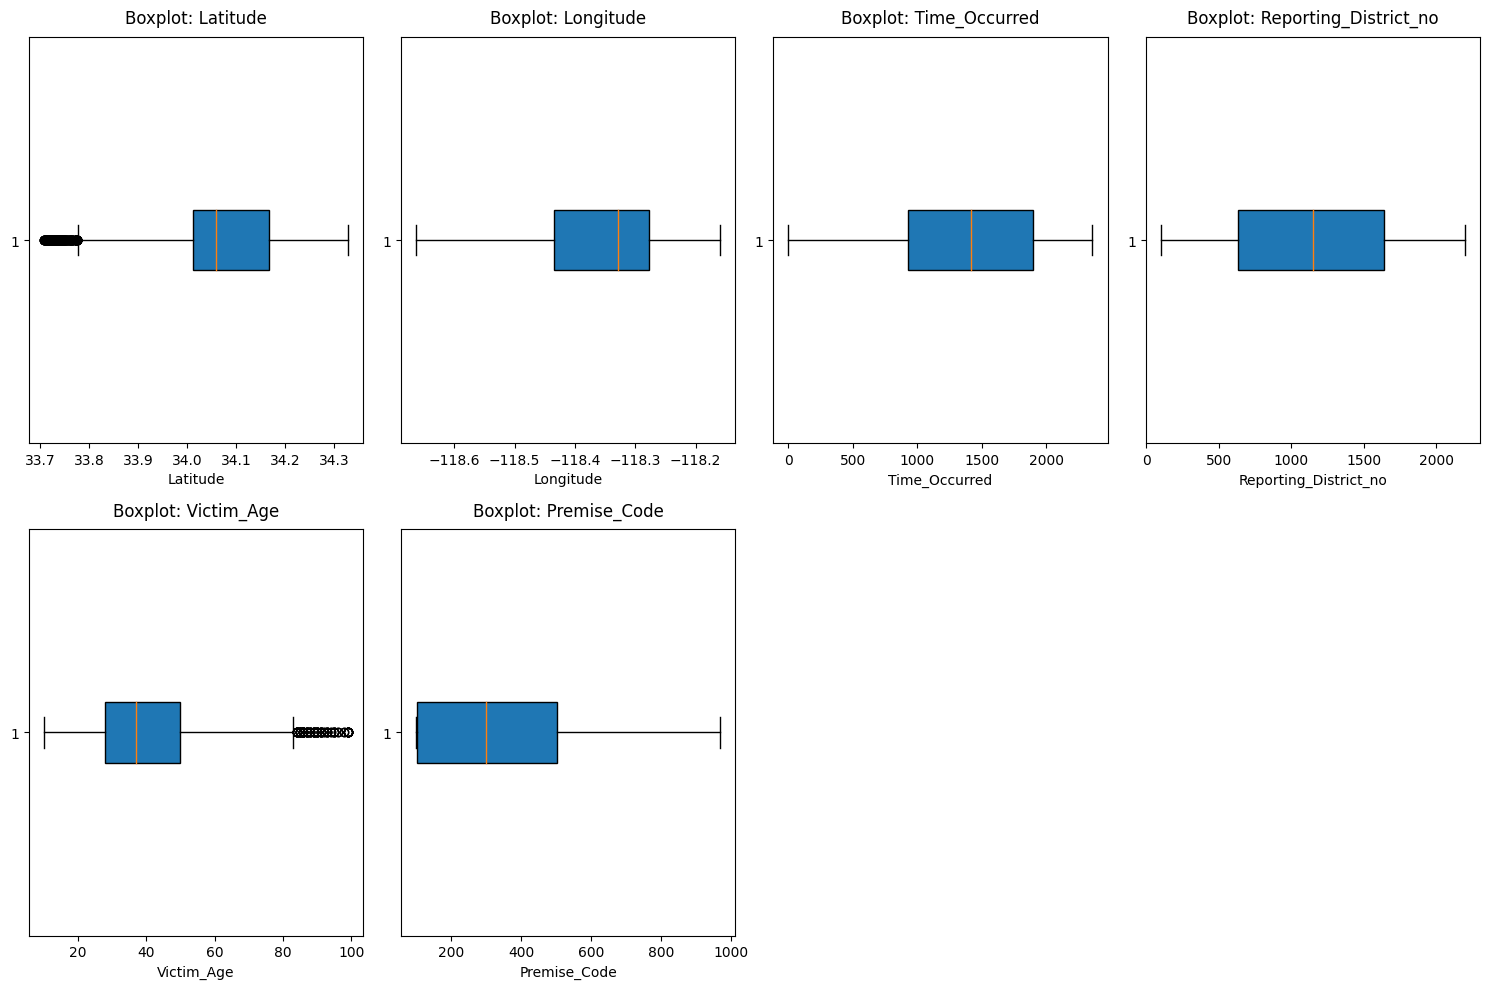

In [33]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numb_columns, 1):
    plt.subplot(2, 4, i)
    plt.boxplot(df[column].dropna(), vert=False, patch_artist=True)
    plt.title(f'Boxplot: {column}', pad=10)
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [34]:
pd.pivot_table(df, index='Premise_Code', columns='Premise_Description', aggfunc='size', fill_value=0)

Premise_Description,7TH AND METRO CENTER (NOT LINE SPECIFIC),ABANDONED BUILDING ABANDONED HOUSE,ABORTION CLINIC/ABORTION FACILITY*,ALLEY,AMUSEMENT PARK*,APARTMENT/CONDO COMMON LAUNDRY ROOM,"AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, ETC.)",AUTO REPAIR SHOP,AUTO SALES LOT,AUTO SUPPLY STORE*,...,UNDERPASS/BRIDGE*,VACANT LOT,VALET,"VEHICLE STORAGE LOT (CARS, TRUCKS, RV'S, BOATS, TRAILERS, ETC.)","VEHICLE, PASSENGER/TRUCK",VETERINARIAN/ANIMAL HOSPITAL,VISION CARE FACILITY*,WAREHOUSE,WEBSITE,YARD (RESIDENTIAL/BUSINESS)
Premise_Code,,,,,,,,,,,,,,,,,,,,,
101.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103.0,0,0,0,102,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107.0,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
957.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
958.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
print("Унікальних Premise_Code:", df['Premise_Code'].nunique())
print("Унікальних Premise_Description:", df['Premise_Description'].nunique())

Унікальних Premise_Code: 204
Унікальних Premise_Description: 203


In [36]:
print("Рядки з Premise_Code, але без Premise_Description:", df[df['Premise_Code'].notna() & df['Premise_Description'].isna()].shape[0])
print("Рядки з Premise_Description, але без Premise_Code:", df[df['Premise_Description'].notna() & df['Premise_Code'].isna()].shape[0])

Рядки з Premise_Code, але без Premise_Description: 5
Рядки з Premise_Description, але без Premise_Code: 0


In [37]:
area_mapping = df.groupby('Premise_Code')['Premise_Description'].unique().reset_index()
area_mapping['Unique_Count'] = area_mapping['Premise_Description'].apply(len)

result = area_mapping[area_mapping['Unique_Count'] > 1]
result

,Premise_Code,Premise_Description,Unique_Count


In [38]:
df = df.drop(columns=['Premise_Code'])

In [39]:
numb_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Числові стовпці для аналізу:", numb_columns)

Числові стовпці для аналізу: ['Latitude', 'Longitude', 'Time_Occurred', 'Reporting_District_no', 'Victim_Age']


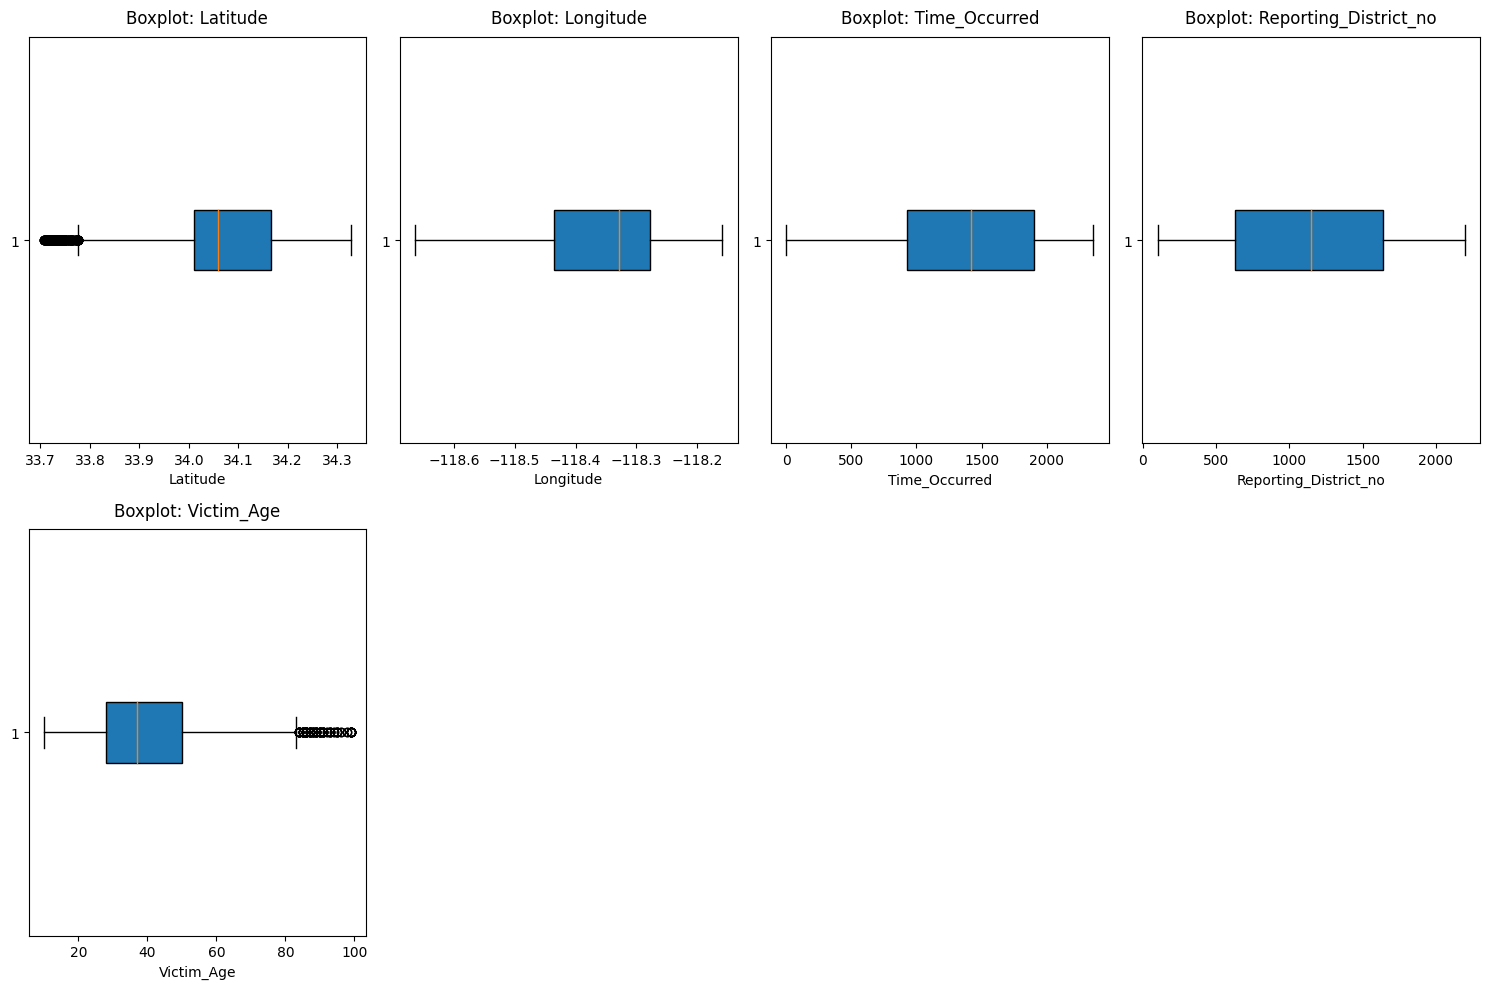

In [40]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numb_columns, 1):
    plt.subplot(2, 4, i)
    plt.boxplot(df[column].dropna(), vert=False, patch_artist=True)
    plt.title(f'Boxplot: {column}', pad=10)
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [41]:
df[numb_columns].isna().sum()

Latitude                 0
Longitude                0
Time_Occurred            0
Reporting_District_no    0
Victim_Age               0
dtype: int64

In [42]:
df.describe()

,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Reporting_District_no,Victim_Age
count,15002.000000,15002.000000,15002,15002,15002.000000,15002.000000,15002.000000
mean,34.075417,-118.357931,2020-07-22 03:11:52.704972544,2020-06-26 13:04:47.481669120,1347.180309,1130.487602,39.978136
min,33.707000,-118.663400,2020-01-01 00:00:00,2020-01-01 00:00:00,1.000000,101.000000,10.000000
25%,34.011100,-118.435200,2020-04-01 00:00:00,2020-03-23 00:00:00,930.000000,632.000000,28.000000
50%,34.059700,-118.328800,2020-07-07 00:00:00,2020-06-25 00:00:00,1415.000000,1151.000000,37.000000
75%,34.167300,-118.277200,2020-10-10 00:00:00,2020-09-26 00:00:00,1900.000000,1642.000000,50.000000
max,34.328100,-118.159300,2024-01-23 00:00:00,2020-12-31 00:00:00,2359.000000,2197.000000,99.000000
std,0.112490,0.104554,NaN,NaN,641.061643,609.835094,15.573581


In [43]:
categor_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categor_columns

['Location',
 'Cross_Street',
 'Area_Name',
 'Part 1-2',
 'Modus_Operandi',
 'Victim_Sex',
 'Victim_Descent',
 'Premise_Description',
 'Weapon_Description',
 'Status',
 'Status_Description',
 'Crime_Category']

In [44]:
df[categor_columns].isna().sum()

Location                   0
Cross_Street           12341
Area_Name                  0
Part 1-2                   0
Modus_Operandi            91
Victim_Sex                 1
Victim_Descent             1
Premise_Description        5
Weapon_Description      8315
Status                     0
Status_Description         0
Crime_Category             0
dtype: int64

In [45]:
X = df.drop(columns='Crime_Category')
y = df['Crime_Category']

In [46]:
high_card_cols = ['Location', 'Cross_Street', 'Modus_Operandi']
low_card_cols = ['Area_Name', 'Part 1-2', 'Victim_Sex', 'Victim_Descent',
                 'Premise_Description', 'Weapon_Description',
                 'Status', 'Status_Description']

In [47]:
categor_columns = high_card_cols + low_card_cols
numb_columns = X.select_dtypes(include='number').columns.tolist()

In [48]:
def frequency_encoder(X):
    import pandas as pd
    if isinstance(X, pd.DataFrame):
        df = X.copy()
    else:
        # Якщо передано масив, перетворюємо його на DataFrame
        df = pd.DataFrame(X, columns=high_card_cols)

    for col in df.columns:
        freq = df[col].value_counts(normalize=True)
        df[col] = df[col].map(freq)
    return df

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer

high_card_transformer = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='constant', fill_value='UNKNOWN')),
    ('freq_encoder', FunctionTransformer(frequency_encoder))
])

In [50]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='UNKNOWN')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [51]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import LinearRegression
from sklearn.impute import IterativeImputer

numerical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(estimator=LinearRegression(), random_state=42))
])

In [52]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('high_card', high_card_transformer, high_card_cols),
    ('low_card', categorical_transformer, low_card_cols),
    ('num', numerical_transformer, numb_columns)
])

In [53]:
from xgboost import XGBClassifier

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        random_state=42,
        eval_metric='mlogloss',
        use_label_encoder=False
    ))
])

In [54]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [200],
    'classifier__max_depth': [6],
    'classifier__learning_rate': [0.1]
}

grid_search = GridSearchCV(
    model_pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X, y_encoded)

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [56]:
import joblib

joblib.dump(grid_search.best_estimator_, 'best_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [57]:
df_test ='/kaggle/input/crime-cast-forecasting-crime-categories/test.csv'

df_test = pd.read_csv(data)
df_test.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [58]:
X_test = df_test.drop(columns='Crime_Category', errors='ignore')

In [60]:
y_test = df_test['Crime_Category']

In [61]:
best_model = joblib.load('best_model.pkl')
label_encoder = joblib.load('label_encoder.pkl')

In [62]:
y_pred = best_model.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}") 

Accuracy: 0.00


In [67]:
print(classification_report(y_test, y_pred))

ValueError: Mix of label input types (string and number)